In [18]:
import pandas as pd


df = pd.read_csv("E:\\data mining\\tous\\covid_data_cleaned.csv")


# Colonnes à transformer (1 devient 0, 2 devient 1)
cols_to_convert = [
    'intubed', 'icu', 'pneumonia', 'contact_other_covid', 'diabetes',
    'hypertension', 'obesity', 'tobacco', 'other_disease', 'renal_chronic',
    'cardiovascular', 'inmsupr', 'copd'
]

# Appliquer la transformation
df[cols_to_convert] = df[cols_to_convert].replace({1: 0, 2: 1})
import numpy as np
df.replace([97, 99], np.nan, inplace=True)

# Imputer les NaN par la valeur la plus fréquente (mode)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Convertir booléens en int si nécessaire
df['patient_type_2'] = df['patient_type_2'].astype(int)

# Enregistrer le fichier nettoyé
df.to_csv("covid_data_cleaned_01.csv", index=False)

print("Fichier enregistré sous : covid_data_cleaned.csv")


C:\Users\user\AppData\Local\Temp\ipykernel_6164\845879310.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Fichier enregistré sous : covid_data_cleaned.csv


In [9]:
df

,age,intubed,icu,pneumonia,contact_other_covid,diabetes,hypertension,obesity,tobacco,other_disease,renal_chronic,cardiovascular,inmsupr,copd,died,patient_type_2
0,27.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,0,0
1,24.0,1.0,1.0,1.0,0.0,1,1,1,1,1,1,1,1,1,0,0
2,54.0,1.0,1.0,1.0,0.0,1,1,0,1,1,1,1,1,1,0,1
3,30.0,1.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,1
4,60.0,1.0,1.0,1.0,0.0,0,0,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,58.0,1.0,1.0,1.0,1.0,0,1,1,1,1,1,1,1,1,0,0
566598,48.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,0,0
566599,49.0,1.0,1.0,0.0,0.0,1,1,0,1,1,1,1,1,1,0,1
566600,43.0,1.0,1.0,0.0,1.0,1,1,1,1,1,1,1,1,1,0,0


## Informations générales sur les données

In [10]:


# Dimensions et types de données
print("Dimensions :", df.shape)
print("Types de données :")
print(df.dtypes)

# Aperçu des données
print("Aperçu des premières lignes :")
print(df.head())

# Statistiques descriptives
print("Statistiques globales :")
print(df.describe(include='all'))


Dimensions : (566602, 16)
Types de données :
age                    float64
intubed                float64
icu                    float64
pneumonia              float64
contact_other_covid    float64
diabetes                 int64
hypertension             int64
obesity                  int64
tobacco                  int64
other_disease            int64
renal_chronic            int64
cardiovascular           int64
inmsupr                  int64
copd                     int64
died                     int64
patient_type_2           int64
dtype: object
Aperçu des premières lignes :
    age  intubed  icu  pneumonia  contact_other_covid  diabetes  hypertension  \
0  27.0      1.0  1.0        1.0                  1.0         1             1   
1  24.0      1.0  1.0        1.0                  0.0         1             1   
2  54.0      1.0  1.0        1.0                  0.0         1             1   
3  30.0      1.0  1.0        0.0                  0.0         1             1   
4  60.0   

## Vérification des valeurs manquantes

In [17]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
age                    0
intubed                0
icu                    0
pneumonia              0
contact_other_covid    0
diabetes               0
hypertension           0
obesity                0
tobacco                0
other_disease          0
renal_chronic          0
cardiovascular         0
inmsupr                0
copd                   0
died                   0
patient_type_2         0
dtype: int64


## Distribution des variables (catégorielles 0/1)

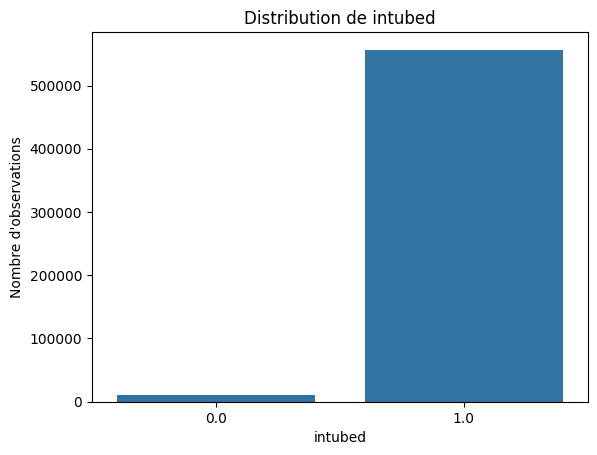

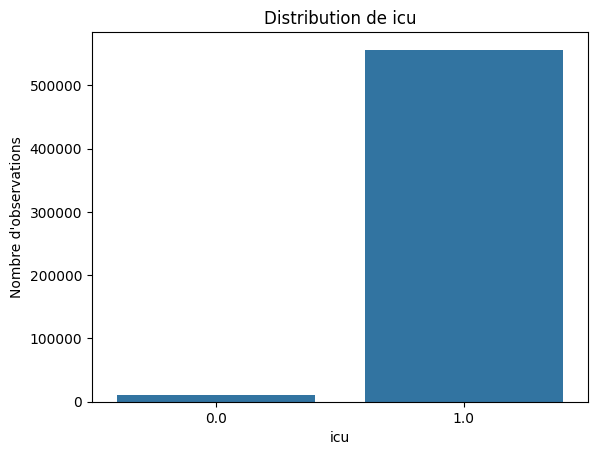

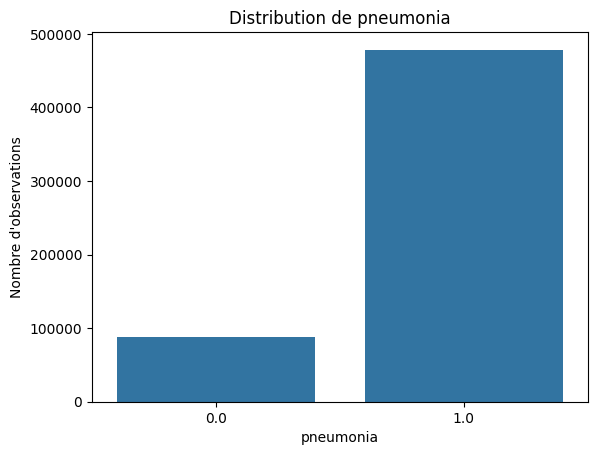

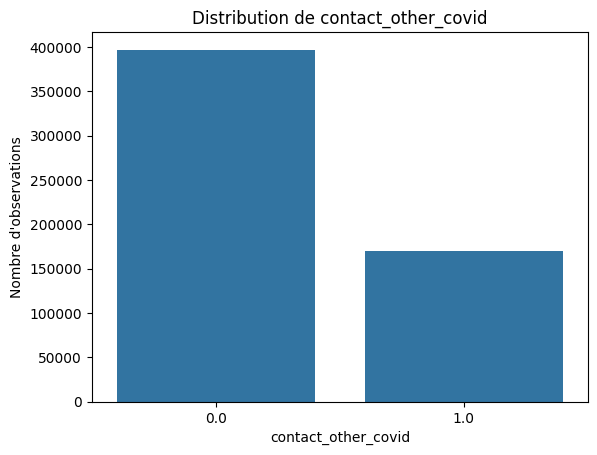

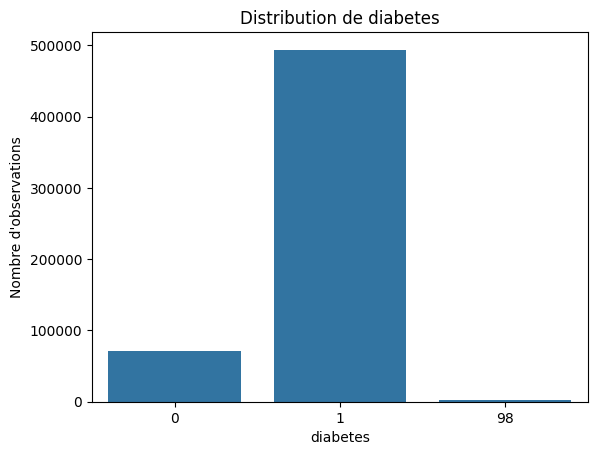

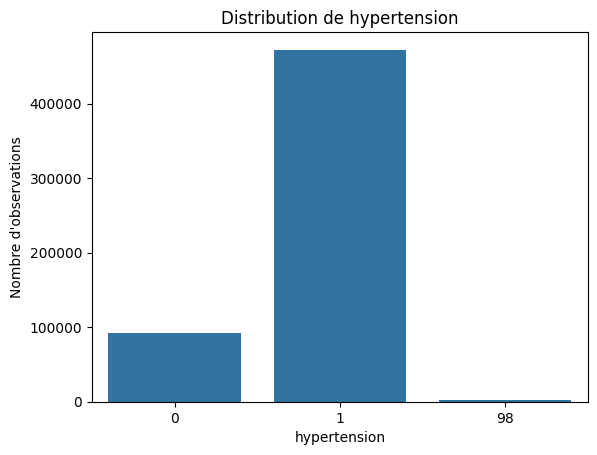

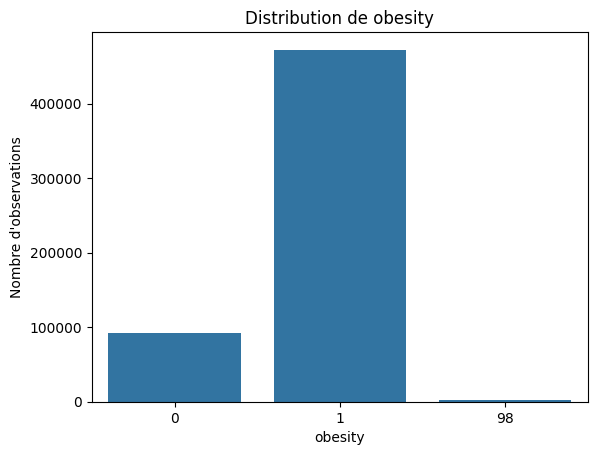

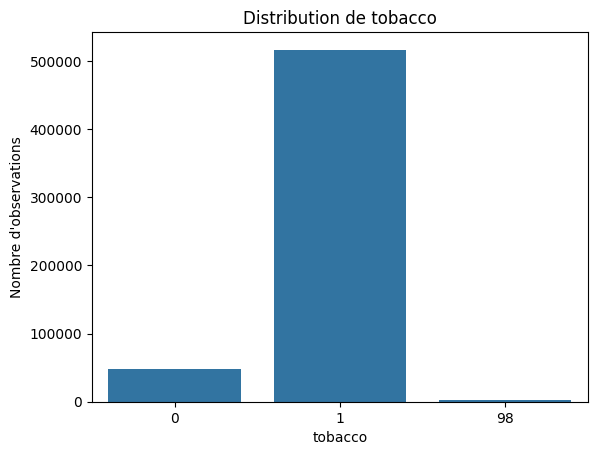

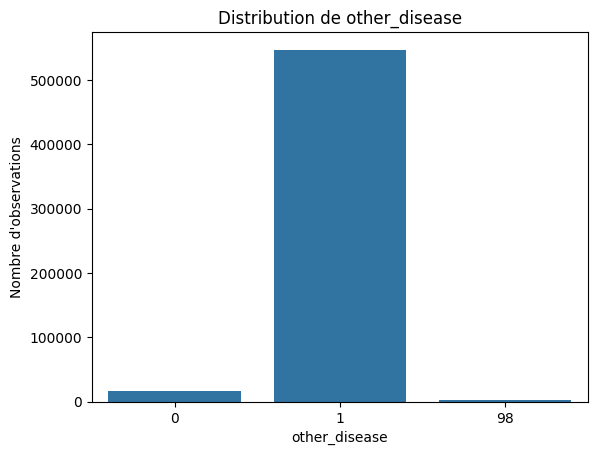

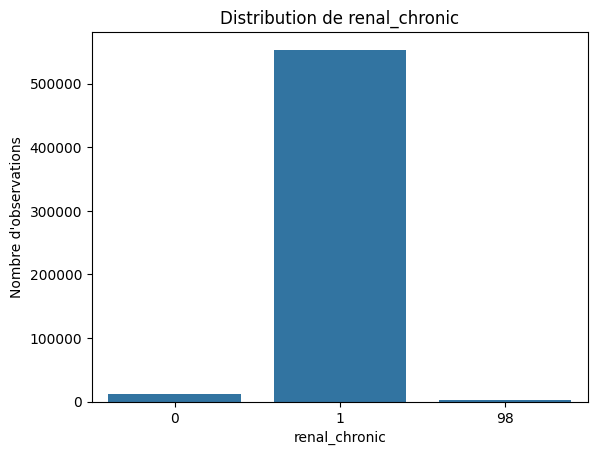

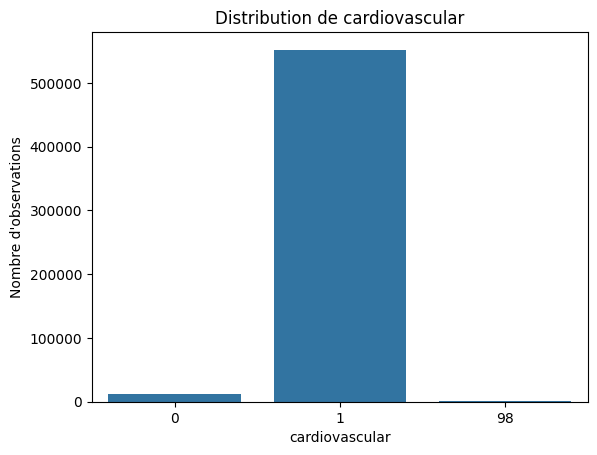

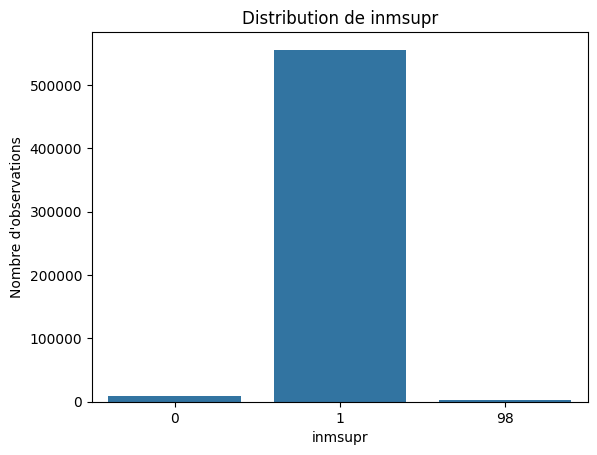

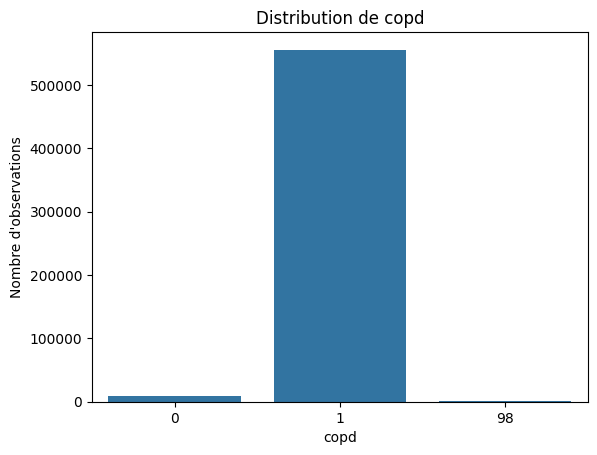

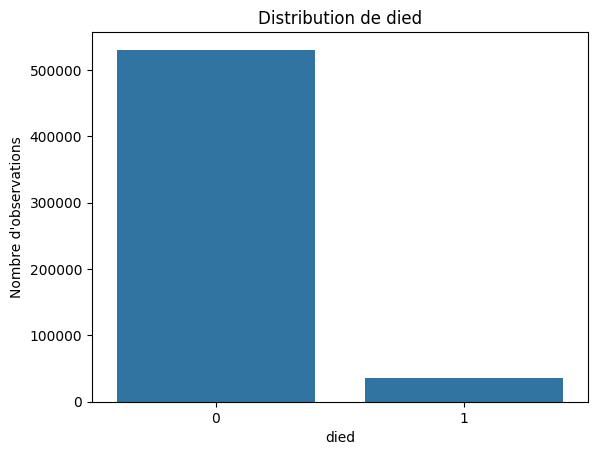

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

binary_cols = [
    'intubed', 'icu', 'pneumonia', 'contact_other_covid', 'diabetes',
    'hypertension', 'obesity', 'tobacco', 'other_disease',
    'renal_chronic', 'cardiovascular', 'inmsupr', 'copd', 'died'
]

for col in binary_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.show()


## Boxplot de l'âge selon la mortalité

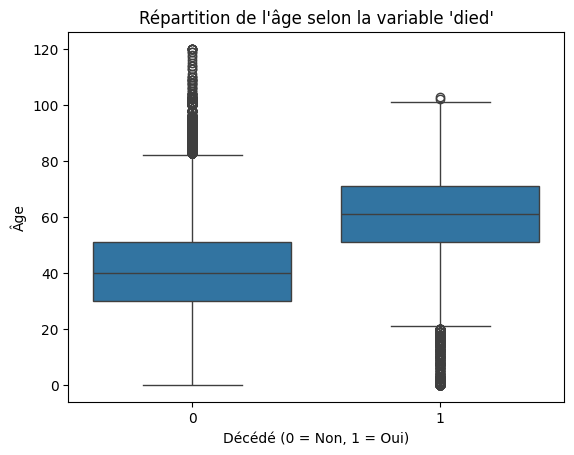

In [13]:
sns.boxplot(x='died', y='age', data=df)
plt.title("Répartition de l'âge selon la variable 'died'")
plt.xlabel("Décédé (0 = Non, 1 = Oui)")
plt.ylabel("Âge")
plt.show()


##  Matrice de corrélation

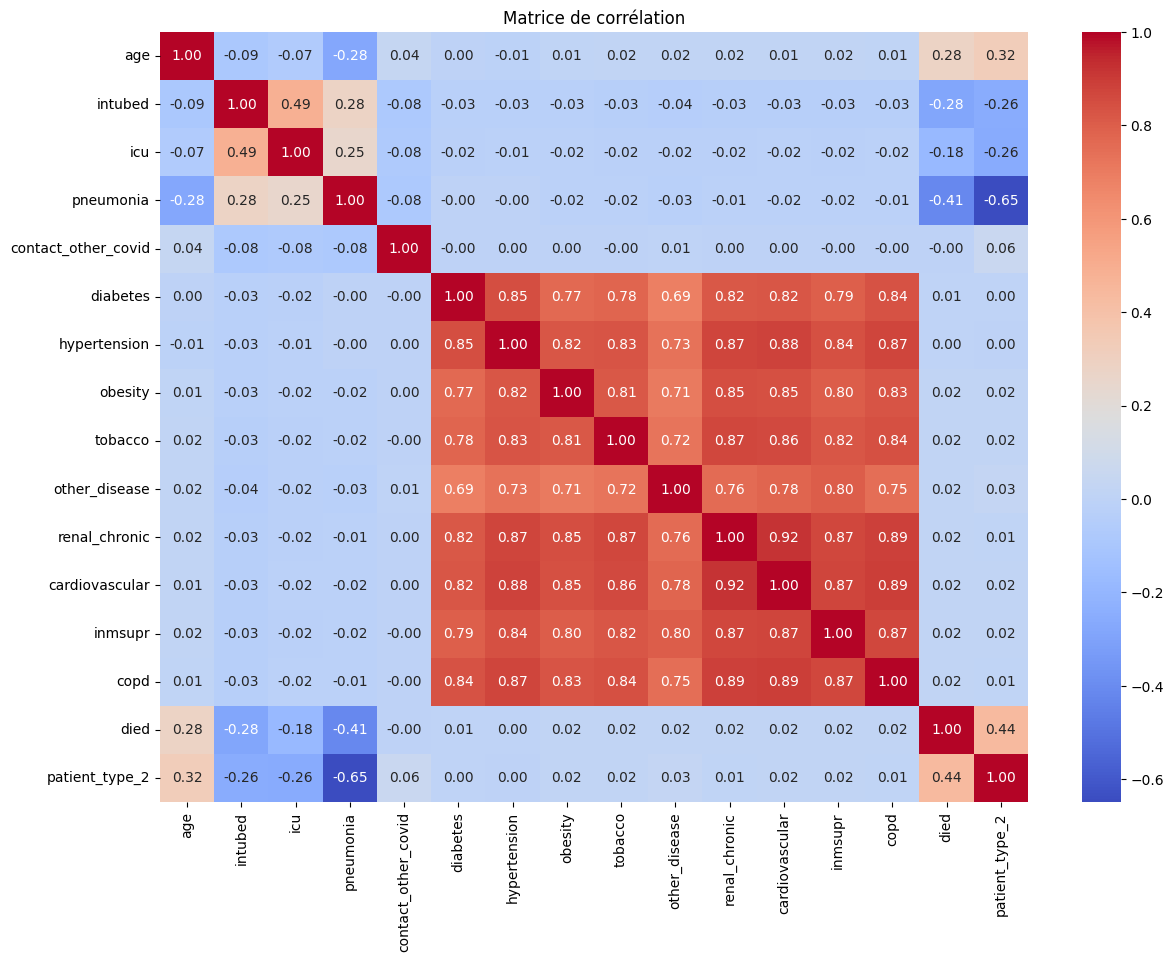

In [14]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


## Analyse croisée avec la variable died

In [16]:
for col in binary_cols:
    if col != 'died':
        crosstab = pd.crosstab(df[col], df['died'], normalize='index')
        print(f"Analyse croisée : {col} vs died")
        print(crosstab, "\n")


Analyse croisée : intubed vs died
died            0         1
intubed                    
0.0      0.419167  0.580833
1.0      0.945408  0.054592 

Analyse croisée : icu vs died
died         0         1
icu                     
0.0   0.609573  0.390427
1.0   0.942087  0.057913 

Analyse croisée : pneumonia vs died
died              0         1
pneumonia                    
0.0        0.701457  0.298543
1.0        0.979408  0.020592 

Analyse croisée : contact_other_covid vs died
died                        0         1
contact_other_covid                    
0.0                  0.935558  0.064442
1.0                  0.937544  0.062456 

Analyse croisée : diabetes vs died
died             0         1
diabetes                    
0         0.812921  0.187079
1         0.954096  0.045904
98        0.869763  0.130237 

Analyse croisée : hypertension vs died
died                 0         1
hypertension                    
0             0.836382  0.163618
1             0.955962  0.044038
9

##  Taux de mortalité par tranche d’âge

C:\Users\user\AppData\Local\Temp\ipykernel_6164\4201012232.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_by_age = df.groupby('age_group')['died'].mean()


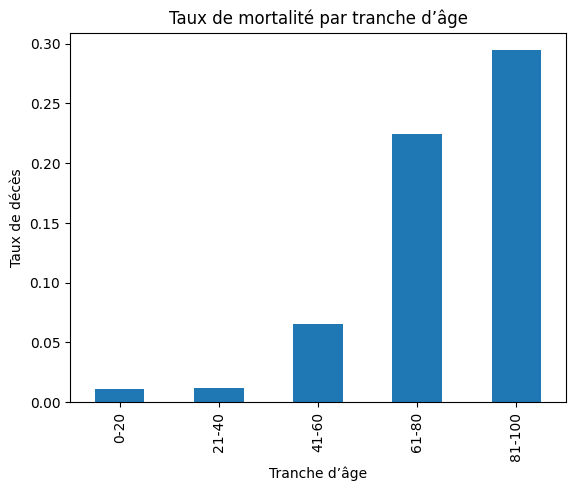

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100],
                         labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

mortality_by_age = df.groupby('age_group')['died'].mean()

mortality_by_age.plot(kind='bar', title='Taux de mortalité par tranche d’âge')
plt.ylabel("Taux de décès")
plt.xlabel("Tranche d’âge")
plt.show()
